In [81]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r'/content/4. Example Data.xlsx')
print(df)

     monthly_salary  fico  utilization  card_limit  card_interest_rate  \
0             78780   897     0.131681       31032            0.037467   
1             10065   794     0.062197       31697            0.034080   
2             97434   880     0.084426       48998            0.096754   
3            126755   729     0.007297       38827            0.041425   
4             70696   624     0.154709        9082            0.055062   
..              ...   ...          ...         ...                 ...   
994           92808   767     0.142965       38832            0.072801   
995           13853   823     0.005400       28031            0.095439   
996          163112   726     0.010636       16501            0.023440   
997          178632   725     0.139171       29530            0.049440   
998          127292   823     0.095064       27206            0.069767   

     model_output  model_target  
0        0.223082             0  
1        0.954314             1  
2        

In [ ]:
list(df['model_output'])

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(data=df, x="model_output")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(data=df, x="model_target")

In [72]:
#quality report
import pandas_profiling as pp
d = pd.DataFrame(df)
print(d)
  
# forming ProfileReport 
profile = pp.ProfileReport(d)
profile.to_file("output.html")



     monthly_salary  fico  utilization  card_limit  card_interest_rate  \
0             78780   897     0.131681       31032            0.037467   
1             10065   794     0.062197       31697            0.034080   
2             97434   880     0.084426       48998            0.096754   
3            126755   729     0.007297       38827            0.041425   
4             70696   624     0.154709        9082            0.055062   
..              ...   ...          ...         ...                 ...   
994           92808   767     0.142965       38832            0.072801   
995           13853   823     0.005400       28031            0.095439   
996          163112   726     0.010636       16501            0.023440   
997          178632   725     0.139171       29530            0.049440   
998          127292   823     0.095064       27206            0.069767   

     model_output  model_target  
0        0.223082             0  
1        0.954314             1  
2        

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
from sklearn.model_selection import train_test_split
import pandas as pd
X = df['model_output']
y = df['model_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
d = pd.DataFrame(df)
X = d.drop(['model_target'], axis=1)
y = d['model_target']

ValueError: ignored

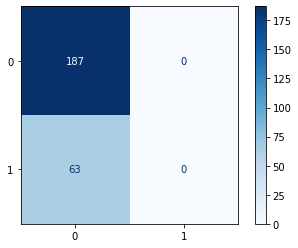

In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


class_names = d.model_target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

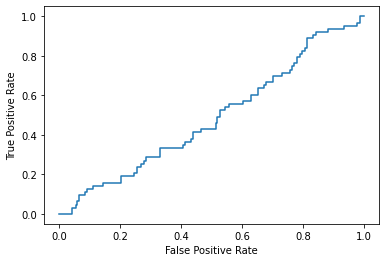

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

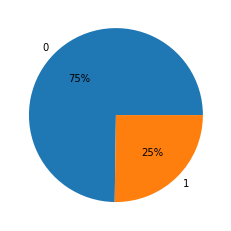

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_excel(r'/content/4. Example Data.xlsx')
d = pd.DataFrame(data)
X = d.drop(['model_target'], axis=1)
y = d['model_target']

import numpy as np
unique, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

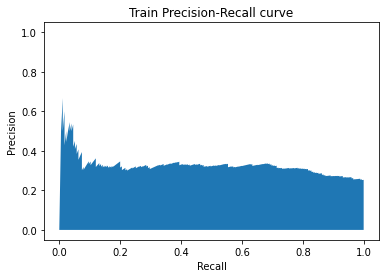

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Fit a Naive Bayes model
clf = GaussianNB().fit(X_train, y_train)
# Predict probability
y_prob_train = clf.predict_proba(X_train)[:,1]
y_prob_test = clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [84]:
! pip install reportlab
from reportlab.lib.colors import PCMYKColor
from reportlab.graphics.charts.lineplots import LinePlot
from reportlab.graphics.shapes import _DrawingEditorMixin, Rect, String, Drawing, Group, Polygon, Line
from reportlab.lib.formatters import DecimalFormatter
from reportlab.lib.utils import flatten
from reportlab.graphics.charts.textlabels import Label

def doLinesIntersect(x1,y1,x2,y2, x3,y3, x4,y4):
	if x1==x2:
		return not (x3 == x4 and x1 != x3)
	elif x3==x4:
		return True
	else:
		#both lines are not parallel to the y-axis
		m1 = (y1-y2)/(x1-x2)
		m2 = (y3-y4)/(x3-x4)
		return m1!=m2

def find_intersection( p0, p1, p2, p3):
	s10_x = p1[0] - p0[0]
	s10_y = p1[1] - p0[1]
	s32_x = p3[0] - p2[0]
	s32_y = p3[1] - p2[1]

	denom = s10_x * s32_y - s32_x * s10_y

	if denom==0: return None # collinear

	denom_is_positive = denom > 0

	s02_x = p0[0] - p2[0]
	s02_y = p0[1] - p2[1]

	s_numer = s10_x * s02_y - s10_y * s02_x

	if (s_numer < 0) == denom_is_positive:
		return None # no collision

	t_numer = s32_x * s02_y - s32_y * s02_x

	if (t_numer < 0) == denom_is_positive:
		return None # no collision

	if (s_numer > denom) == denom_is_positive or (t_numer > denom) == denom_is_positive:
		return None # no collision

	# collision detected
	t = t_numer / float(denom)
	return (p0[0] + (t * s10_x), p0[1] + (t * s10_y))

class ShadeAnnotation:
	def __init__(self,AA,Z,shade):
		self.AA = AA
		self.Z = Z
		self.shade = shade
		self.beforeLines = True

	def __call__(self,chart,xScale,yScale):
		AA = self.AA
		Z = self.Z
		data = chart.data
		yellow = data[0]
		blue = data[1]

		for i in range(1,len(yellow)):
			z = find_intersection(yellow[i-1],yellow[i],blue[i-1],blue[i])
			if z: break
		if z:
			AA = z[0]
			b0 = [v for v in blue if v[0]<=AA]
			y0 = [v for v in yellow if v[0]<=AA]
			if b0[-1][0]!=AA:
				b0.append(z)
			if y0[-1][0]!=AA:
				y0.append(z)
			if y0[-1]==b0[-1]: y0 = y0[:-1]
			b1 = [v for v in blue if v[0]>=AA and v[0]<=Z]
			y1 = [v for v in yellow if v[0]>=AA and v[0]<=Z]
			if b1[0][0]!=AA:
				b1.insert(0,z)
			if y1[0][0]!=AA:
				y1.insert(0,z)
			if y1[0]==b1[0]:
				y1 = y1[1:]
			chart._zValue = (b1[-1][0],(max(b1[-1][1],y1[-1][1]),min(b1[-1][1],y1[-1][1])))
			chart._aaValue = z
			G = Group()
			y0.reverse()
			y1.reverse()
			G.add(Polygon(flatten([(xScale(xy[0]),yScale(xy[1])) for xy in b0+y0]),fillColor=self.shade,strokeColor=self.shade,strokeWidth=1))
			G.add(Polygon(flatten([(xScale(xy[0]),yScale(xy[1])) for xy in b1+y1]),fillColor=self.shade,strokeColor=self.shade,strokeWidth=1))
			return G

class LineAnnotation:
	def __init__(self,label,valueAttr=None,labelDy=0,labelDx=0,labelVfac=1,strokeColor=PCMYKColor(0,0,0,100),strokeWidth=1.5,strokeDashArray=(5,2),labelMinY=None,labelMaxY=None):
		self.label = label
		self.valueAttr = valueAttr
		self.labelDx = labelDx
		self.labelDy = labelDy
		self.labelVfac = labelVfac
		self.strokeColor = strokeColor
		self.strokeWidth = strokeWidth
		self.strokeDashArray = strokeDashArray
		self.beforeLines = False
		self.labelMinY = labelMinY
		self.labelMaxY = labelMaxY

	def __call__(self,chart,xScale,yScale):
		x = getattr(chart,self.valueAttr,None)
		if x is None: return
		x, y = x
		x = xScale(x)
		if isinstance(y,tuple):
			yt = yScale(y[1])
			y = yScale(y[0])
		else:
			y = yt = yScale(y)
		z = yScale(chart.yValueAxis._valueMin)
		G = Group()
		G.add(Line(x,z,x,y,strokeColor=self.strokeColor,strokeWidth=self.strokeWidth,strokeDashArray=self.strokeDashArray))
		ly = z + self.labelVfac*(yt-z) + self.labelDy
		if self.labelMinY is not None: ly = max(ly,self.labelMinY)
		if self.labelMaxY is not None: ly = min(ly,self.labelMaxY)
		self.label.y = ly
		self.label.x = x + self.labelDx
		G.add(self.label)
		return G

class AnnotatedLinePlot(_DrawingEditorMixin,Drawing):
	def __init__(self,width=400,height=200,*args,**kw):
		Drawing.__init__(self,width,height,*args,**kw)
		self._stdFont = 'Helvetica'
		self._condFont = 'Helvetica'
		self._boldFont = 'Helvetica-Bold'
		self._boldCondFont = 'Helvetica-Bold'
		self._data = [(71.0, 85.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 29774.0, 30706.0, 31668.0, 32661.0, 33684.0, 34740.0, 35829.0, 36952.0, 38110.0, 39305.0, 40538.0, 41809.0, 43121.0, 44473.0, 45868.0, 47307.0, 48792.0, 50323.0, 51902.0, 53531.0, 55212.0, 56945.0, 58733.0, 60578.0, 62480.0, 64442.0, 66467.0, 68555.0, 70709.0, 72931.0, 75223.0, 35180.0, 35658.0, 36152.0, 36662.0, 37189.0, 37733.0, 38295.0, 38876.0, 39475.0, 40094.0, 40734.0, 41394.0, 42077.0, 42781.0, 43509.0, 44261.0, 45037.0, 45839.0, 46667.0, 47522.0, 48406.0, 49318.0, 50261.0, 51234.0, 52240.0, 53278.0, 54351.0, 55459.0, 56603.0, 57785.0, 59006.0)]
		myblue = PCMYKColor(100,22,0,0)
		myyellow = PCMYKColor(0,37,100,0)
		self._mylightblue = mylightblue = PCMYKColor(18.6,11.8,1.8,0)
		self.height = 216.74
		self.width = 509.308
		self._add(self,LinePlot(),name='chart',validate=None,desc=None)
		self.chart.x   = 54.178
		self.chart.y = 59.16
		self.chart.width = 436.652
		self.chart.height          = 129
		self.chart.yValueAxis.tickLeft           = 0
		self.chart.yValueAxis.visibleGrid=1
		self._add(self,Label(),name='yL',validate=None,desc=None)
		self.yL.fontName       = self._boldFont
		self.yL.angle=90
		self.yL.boxAnchor      = 's'
		self.yL.x=12
		self.yL.y=self.chart.y+0.5*self.chart.height
		self.yL._text='Total Pension (\xa3p.a.)'
		self._add(self,Label(),name='xL',validate=None,desc=None)
		self.xL.fontSize       = 8
		self.xL.fontName       = self._boldFont
		self.xL._text='Age'
		self.xL.textAnchor='middle'
		self.xL.boxAnchor      = 'n'
		self.xL.x=self.chart.x + 0.5*self.chart.width
		self.xL.y=self.chart.y - 10
		self._aaLabel = Label(_text='Cross-over' '\n' 'age',boxAnchor='nw',fontName=self._boldCondFont,fontSize=9)
		self._zLabel = Label(_text='Break-even' '\n' 'point',boxAnchor='nw',fontName=self._boldCondFont,fontSize=9)
		self._add(self,Rect(226.66-43.22,578.05-553.69,18.087,5,strokeColor=None,fillColor=myyellow),name='ry',validate=None,desc=None)
		self._add(self,Rect(313.79-43.22,578.05-553.69,18.087,5,strokeColor=None,fillColor=myblue),name='rb',validate=None,desc=None)
		self._add(self,String(250.917-43.22,578.05-549.726-7,'Pension A',fontName=self._boldFont,fontSize=10),name='sy0',validate=None,desc=None)
		self._add(self,String(250.917-43.22,578.05-560.562-7,'Current pension',fontName=self._condFont,fontSize=9),name='sy1',validate=None,desc=None)
		self._add(self,String(337.395-43.22,578.05-549.726-7,'Pension B',fontName=self._boldFont,fontSize=10),name='sb0',validate=None,desc=None)
		self._add(self,String(337.395-43.22,578.05-560.562-7,'Pension if option chosen',fontName=self._condFont,fontSize=9),name='sb1',validate=None,desc=None)
		self.chart.lines[0].strokeColor = myyellow
		self.chart.lines[1].strokeColor = myblue
		self.chart.lines.strokeWidth = 2.5
		self.chart.yValueAxis.labelTextFormat=DecimalFormatter(0,prefix='\xa3',thousandSep=',')
		self.chart.yValueAxis.rangeRound='both'
		self.chart.yValueAxis.avoidBoundFrac = (0.1,0)
		self.chart.xValueAxis.valueStep = 1
		self.chart.xValueAxis.labels[0].visible=0
		self.chart.xValueAxis.labels.textAnchor='end'
		self.chart.xValueAxis.labels.boxAnchor='n'
		self.chart.xValueAxis.labels.dy = -2
		self.chart.yValueAxis.labels.fontName         = self._stdFont
		self.chart.yValueAxis.labels.fontSize         = 7
		self.chart.xValueAxis.labels.fontName         = self._stdFont
		self.chart.xValueAxis.labels.fontSize         = 7
		self._aaLabel._bottom        = 25

	def getContents(self):
		data = self._data[0]
		AA = data[0]
		Z = data[1]
		ages = list(data[2:33])
		while ages[-1] is None: ages.pop()
		nA = len(ages)
		ages = [ages[0]+i for i in range(nA)]
		yellow = data[33:33+nA]
		blue = data[64:64+nA]
		chart = self.chart
		yAxis = chart.yValueAxis
		xAxis = chart.xValueAxis
		xAxis.maximumTicks = len(ages)
		xAxis.minimumTickSpacing = 1
		xAxis.valueMin = int(ages[0]-0.5)
		xAxis.valueMax = int(ages[-1]+0.5)
		xAxis.labels.dx = -0.5*(chart.width/float(nA))
		chart.data = [[(ages[i]-0.5,yellow[i]) for i in range(max(len(ages),len(yellow)))],[(ages[i]-0.5,blue[i]) for i in range(max(len(ages),len(blue)))]]
		chart.annotations = [ShadeAnnotation(AA-0.5,Z-0.5,self._mylightblue)]
		chart.annotations += [LineAnnotation(self._aaLabel,valueAttr='_aaValue',labelDx=2,labelVfac=0.6,labelDy=0,labelMinY=83)]
		chart.annotations += [LineAnnotation(self._zLabel,valueAttr='_zValue',labelDx=2,labelVfac=1,labelDy=-10)]
		return Drawing.getContents(self)

if __name__=="__main__": #NORUNTESTS
	AnnotatedLinePlot().save(formats=['pdf'],outDir='.',fnRoot=None)
 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
